Generate a 2D dataset containing 4 different large objects, and then apply the k-means algorithm to see the result.

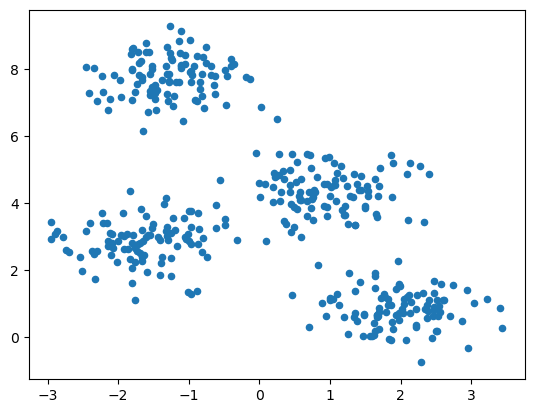

In [1]:
# начнем с импорта необходимых пакетов
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
# сгенерируем данные
from sklearn.datasets import make_blobs
x, y_true = make_blobs(n_samples=400, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(x[:, 0], x[:, 1], s=20)
plt.show()

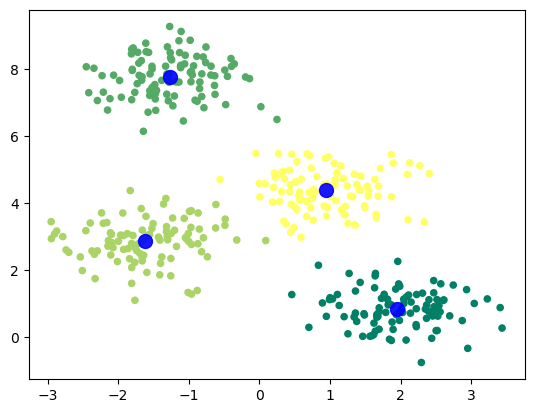

In [2]:
# Затем создадим объектт KMeans вместе с указанием количества кластеров
# и обучим модель и сделаем прогноз следующим образом:
kmeans = KMeans(n_clusters=4)
kmeans.fit(x)
y_kmeans = kmeans.predict(x)
# Построим и визуализируем центры кластера, выбранные с помощью k-средних оценки Python 
from sklearn.datasets import make_blobs
x, y_true = make_blobs(n_samples=400, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(x[:, 0], x[:, 1], c=y_kmeans, s=20, cmap='summer')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='blue', s=100, alpha=.9)
plt.show()

1.1.1 Perform clustering of K-means to a set of simple digits. K-means
will try to identify similar numbers


In [4]:
# Начнем с импорта необходимых пакетов
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans

# загрузим набор цифр из sklearn
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [5]:
# выполним кластеризацию
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

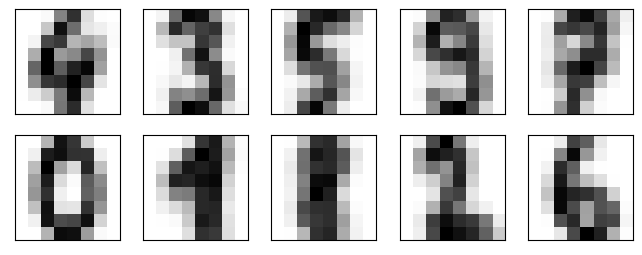

In [6]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

To do: 

An array of data is given
It is required to perform a cluster analysis of the data using the k-means method.
Experiment with the number of clusters.

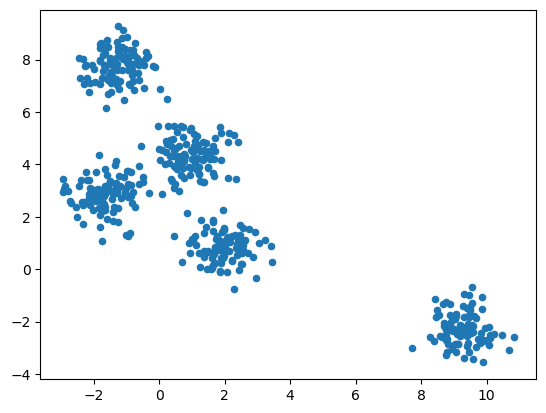

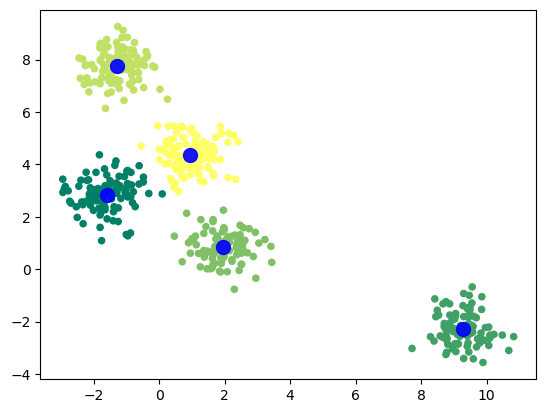

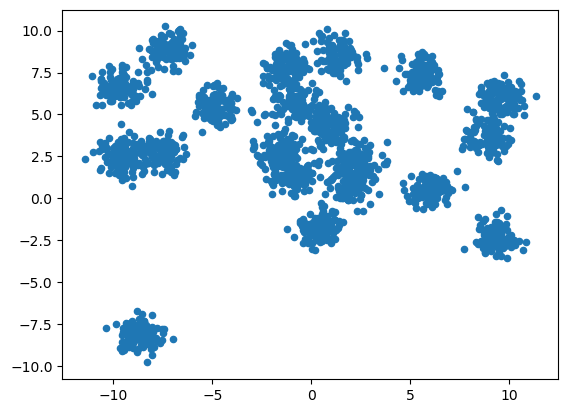

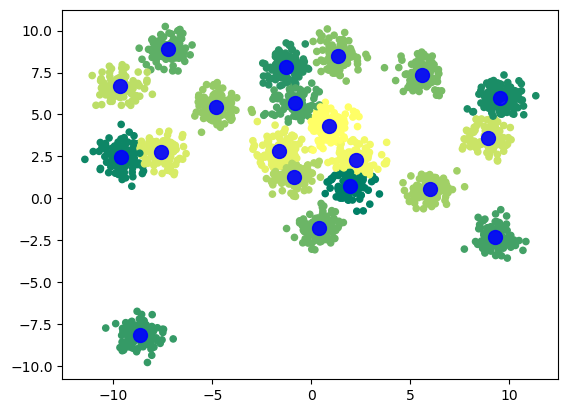

In [7]:
def cluster_analysis(x, clusters):
    x, y_true = make_blobs(n_samples=clusters * 100, centers=clusters, cluster_std=.6, random_state=0)
    plt.scatter(x[:, 0], x[:, 1], s=20)
    plt.show()
    
    kmeans = KMeans(n_clusters=clusters)
    kmeans.fit(x)
    y_kmeans = kmeans.predict(x)
    
    x, y_true = make_blobs(n_samples=clusters * 100, centers=clusters, cluster_std=.6, random_state=0)
    plt.scatter(x[:, 0], x[:, 1], c=y_kmeans, s=20, cmap='summer')
    centers = kmeans.cluster_centers_
    plt.scatter(centers[:, 0], centers[:, 1], c='blue', s=100, alpha=.9)
    plt.show()
    
    
X = np.array([[5, 3],
             [10, 15],
             [15, 15],
             [24, 10],
             [30, 45],
             [85, 70],
             [71, 80],
             [60, 78],
             [55, 52],
             [80, 91]])
cluster_analysis(X, 5) # количество кластеров = 5
cluster_analysis(X, 20) # количество кластеров = 10

To do: 

Perform clustering for the Fischer iris dataset. Make
predictions for the model. Experiment with the number of clusters.

4 кластера:
(150, 4)
(5, 4)


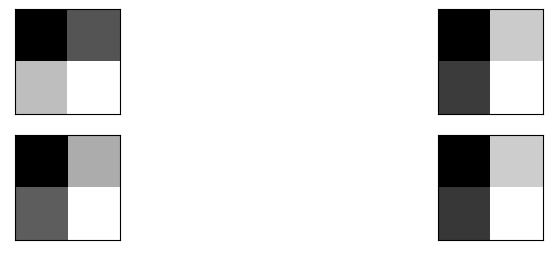

In [10]:
from sklearn.datasets import load_iris


def clusterization(x, amount):
    print(x.data.shape)
    kmeans = KMeans(n_clusters=amount, random_state=0)
    clusters = kmeans.fit_predict(x.data)
    print(kmeans.cluster_centers_.shape)
    
    fig, ax = plt.subplots(amount // 2, 2, figsize=(10, 3))
    centers = kmeans.cluster_centers_.reshape(amount, 2, 2)
    for axi, center in zip(ax.flat, centers):
        axi.set(xticks=[], yticks=[])
        axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)
        

X = load_iris()
print('4 кластера:')
clusterization(X, 5)


20 кластеров:
(150, 4)
(20, 4)


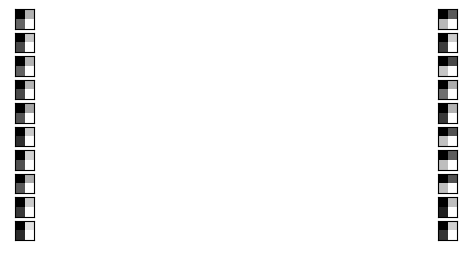

In [11]:
print('\n20 кластеров:')
clusterization(X, 20)

1.1.2 Build a dendrogram for a given data array

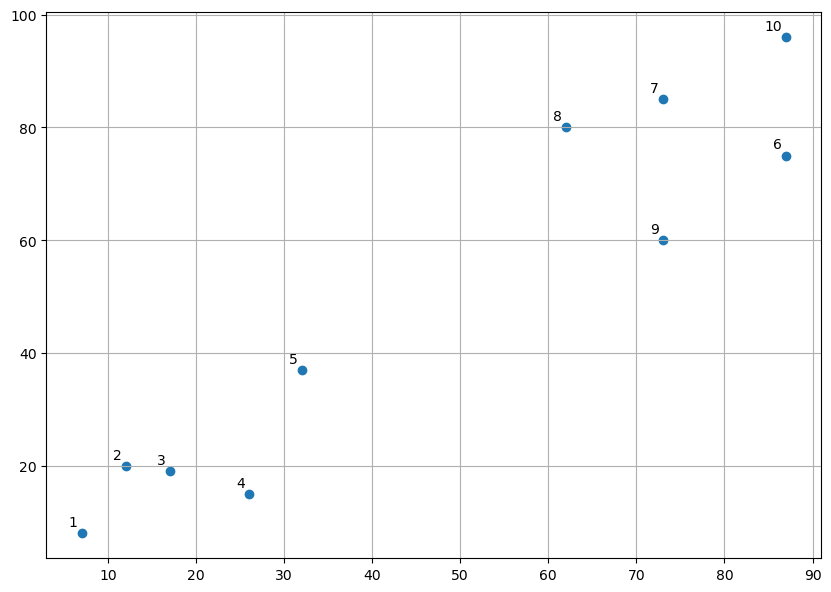

In [15]:
import matplotlib.pyplot as plt
import numpy as np
X = np.array([[7, 8], [12, 20], [17, 19], [26, 15], [32, 37], [87, 75], [73, 85], [62, 80], [73, 60], [87, 96]])
labels = range(1, 11)
plt.figure(figsize=(10, 7))
plt.subplots_adjust(bottom=.1)
plt.grid()
plt.scatter(X[:, 0], X[:, 1], label='True Position')
for label, x, y in zip(labels, X[:, 0], X[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-3, 3), textcoords='offset points', ha='right', va='bottom')
plt.show()

Next, build a dendrogram for the data points using the Scipy library

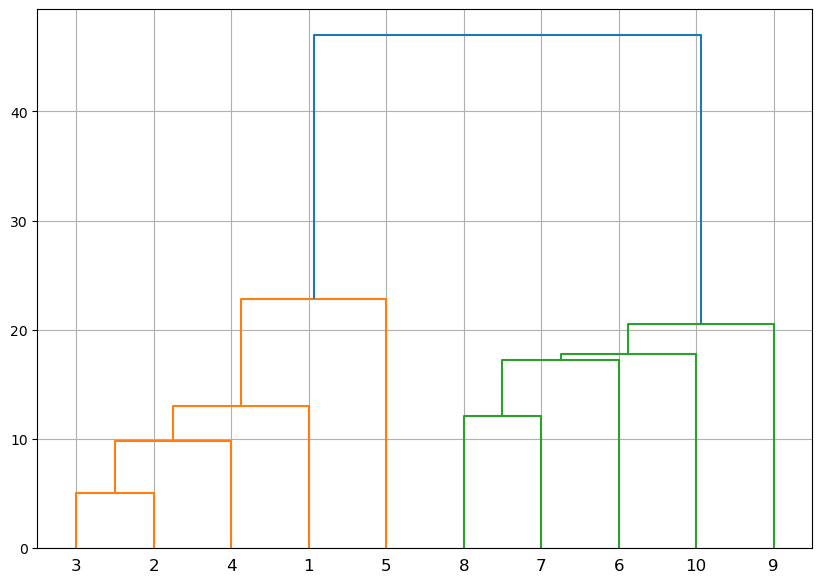

In [19]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
linked = linkage(X, 'single')
label_list = range(1, 11)
plt.figure(figsize=(10, 7))
plt.grid()
dendrogram(linked, orientation='top', labels=label_list, distance_sort='descending', show_leaf_counts=True)
plt.show()

Next, you need to import the clustering class and call its fit_predict method to predict the cluster.

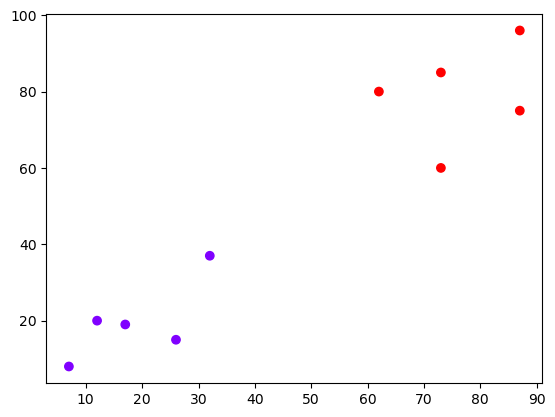

In [20]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=cluster.labels_, cmap='rainbow')

To do:

Perform hierarchical clustering of real
data and see how it can be used to solve a real
problem. Perform data clustering by set
https://raw.githubusercontent.com/lucko515/clusteringpython/master/Customer%20in%20Mall%20clusterng/Mall_Customers.csv

The task of the co is to
divide customers into different groups depending on their purchasing
trends.

In [21]:
# импортируем библиотеки
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# загрузим набор данных
url = r'https://raw.githubusercontent.com/lucko515/clustering-python/master/Customer%20in%20Mall%20clusterng/Mall_Customers.csv'
customer_data = pd.read_csv(url)
customer_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [22]:
customer_data.shape

(200, 5)

Our dataset consists of five columns. To view the results
in two-dimensional space, we will save only two of them:"Annual income"
(in thousands of dollars) and "Cost estimate" (1-100). The "
Cost Estimate" column shows how often a person spends money at the mall
on a scale from 1 to 100, where 100 is the highest expense. Let
's run the following script to filter the first three columns from our
dataset:

In [23]:
data = customer_data.iloc[:, 3:5].values

Next, we need to know the clusters into which we want to divide our
data. We will again use the scipy library to create
a dendrogram:

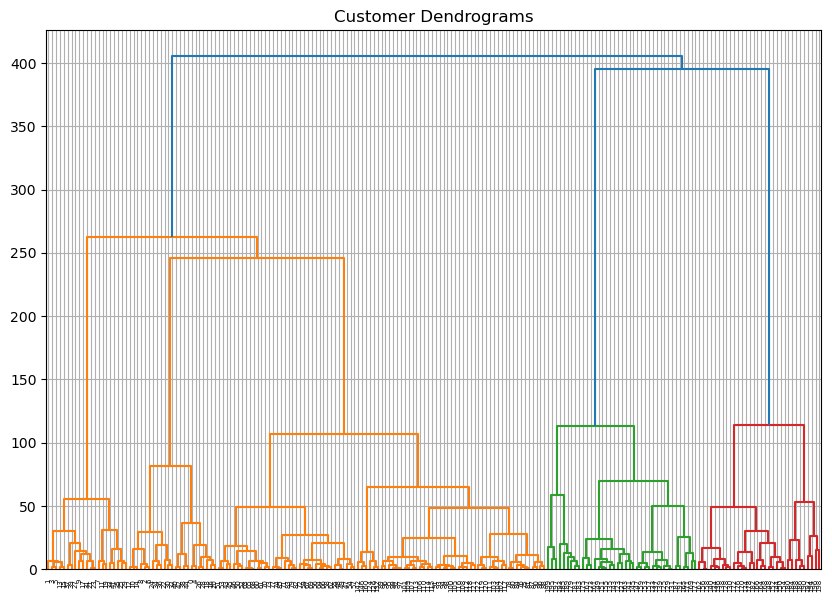

In [25]:
import scipy.cluster.hierarchy as shc
#figure(figsize=(28, 12), dpi=180)
plt.figure(figsize=(10, 7))
plt.grid()
plt.title('Customer Dendrograms')
dend = shc.dendrogram(shc.linkage(data, method='ward'))

If we draw a horizontal line that runs through the
longest distance without a horizontal line, we get 5 clusters.
Now we know the number of clusters for our dataset,
the next step is to group the data points into these five clusters.

To do this, we will again use the Agglomerative Clustering class
of the sklearn.cluster library

In [26]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(data)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

As a final step, let's build clusters to see how
our data was actually grouped.:

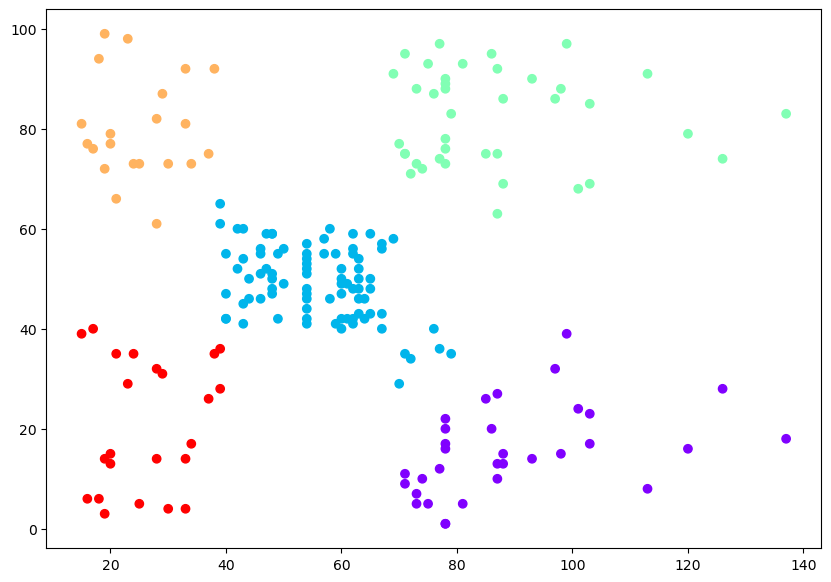

In [27]:
plt.figure(figsize=(10, 7))
plt.scatter(data[:, 0], data[:, 1], c=cluster.labels_, cmap='rainbow')

To Do:

Perform hierarchical clustering for
the Fischer iris dataset. In this case, you must use any two signs
(there are four of them in total).

In [38]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

iris_data = load_iris()
mydata = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)
mydata.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [39]:
mydata.shape

(150, 4)

In [52]:
data = mydata.iloc[:, 1:3].values

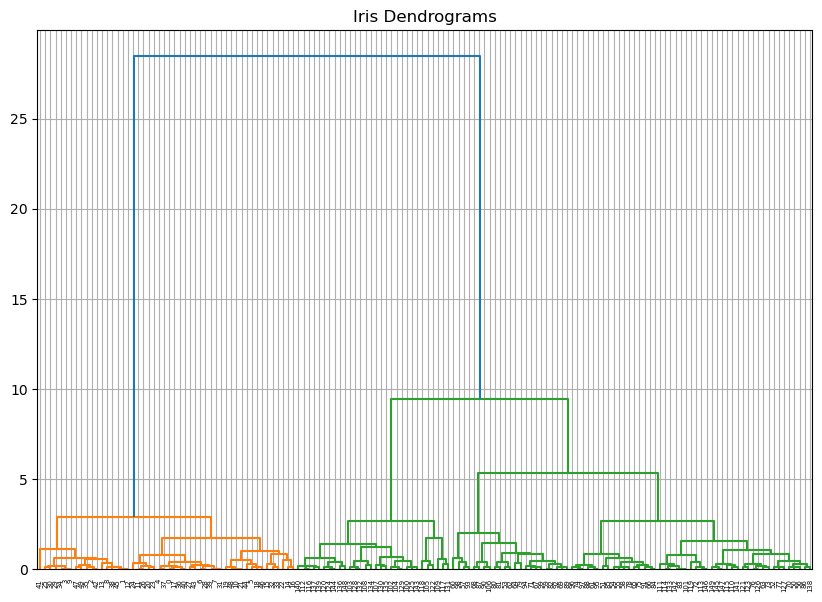

In [53]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))
plt.title('Iris Dendrograms')
plt.grid()
dend = shc.dendrogram(shc.linkage(data, method='ward'))

In [54]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
cluster.fit_predict(data)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 3, 1, 1, 1, 3, 1, 3, 3, 1, 3, 1, 3, 1,
       1, 3, 3, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 1, 1, 1, 1, 3,
       1, 3, 3, 1, 3, 3, 3, 1, 1, 1, 3, 3, 2, 1, 2, 2, 2, 2, 3, 2, 2, 2,
       1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1])

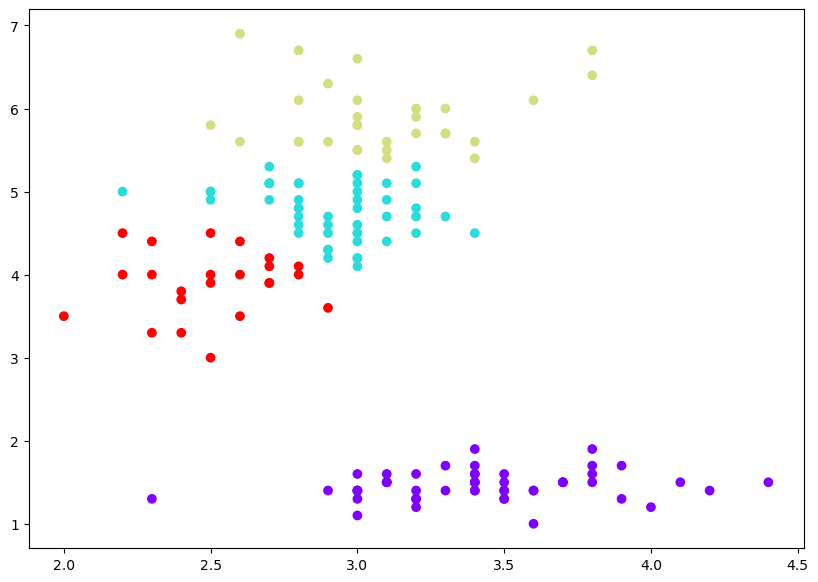

In [55]:
plt.figure(figsize=(10, 7))
plt.scatter(data[:, 0], data[:, 1], c=cluster.labels_, cmap='rainbow')